# Creating a Space for Image Observations

In this exercise we will create a space to represent Image observation. Image-based observations are very important in Reinforcement Learning since they allow the agent to learn from pixels and require a very limited feature engineering or feature extraction phase, in this way the agent can focus on what is important for its task without being limited from the heuristics decided manually from the user. We will create a space representing RGB images with dimensions equal to 256x256.

In [15]:
import gym
from gym import spaces

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # used for the dtype of the space

We are dealing with 256x256 RGB images, so the space has a shape of (256, 256, 3). In addition, images range from 0 to 255 (if we consider uint8 images):

In [16]:
# since the Space is RGB images with shape 256x256 the final shape is (256, 256, 3)
shape = (256, 256, 3)

# If we consider uint8 images the bounds are 0-255
low = 0
high = 255

# Space type: unsigned int
dtype=np.uint8

We are now ready to create the space. An Image is a Box space since it has defined bounds:

In [17]:
# create the space
space = spaces.Box(low=low, high=high, shape=shape, dtype=dtype)

# Print space representation
print("Space", space)

Space Box(256, 256, 3)


In [18]:
# Sample from the space
sample = space.sample()
print("Space Sample", sample)

Space Sample [[[171 191 109]
  [174  13   4]
  [136 178  95]
  ...
  [125 198  10]
  [138 255  18]
  [211 214 244]]

 [[173 137 213]
  [146  81  23]
  [237 244 245]
  ...
  [ 71 251 113]
  [ 19 182 185]
  [  7 140 156]]

 [[115  85 232]
  [ 40   1  43]
  [138 242 113]
  ...
  [134   3  17]
  [193  11  14]
  [ 89 198 121]]

 ...

 [[ 95 227 145]
  [249  41 144]
  [232 189  33]
  ...
  [113  95 229]
  [218   2 207]
  [115 175 159]]

 [[114 174 125]
  [ 70 255  67]
  [ 56  33  48]
  ...
  [169  30  89]
  [ 40 134   8]
  [203 122 159]]

 [[251 243 138]
  [130 253  71]
  [216 181 243]
  ...
  [250 239   1]
  [161 109 179]
  [198  68  59]]]


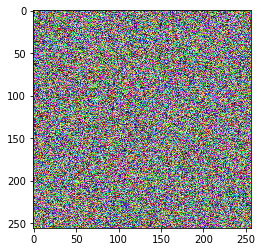

In [19]:
plt.imshow(sample)

Now let’s suppose we want to give our agent the possibility to see the last n=4 frames. This is a very useful techniques to let the agent understands its movement. Adding the temporal component, we obtain a state representation composed of 4 dimensions, the first dimension is the temporal one, the second is the width, the third is the height and the last one is the channels.

In [20]:
# we want a space representing the last n=4 frames
n_frames = 4  # number of frames
width = 256  # image width
height = 256  # image height
channels = 3  # number of channels (RGB)
shape_temporal = (n_frames, width, height, channels)
# create a new instance of space
space = spaces.Box(low=low, high=high, shape=shape_temporal, dtype=dtype)